In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import os


In [2]:
data = pd.read_csv("master.csv")
#figsize(14,8)
# ; kills the plot describtion

In [3]:
data=data.drop(['HDI for year','country-year'],axis=1)
data=data.dropna()

## Suicide Rates Overview 1985 to 2016

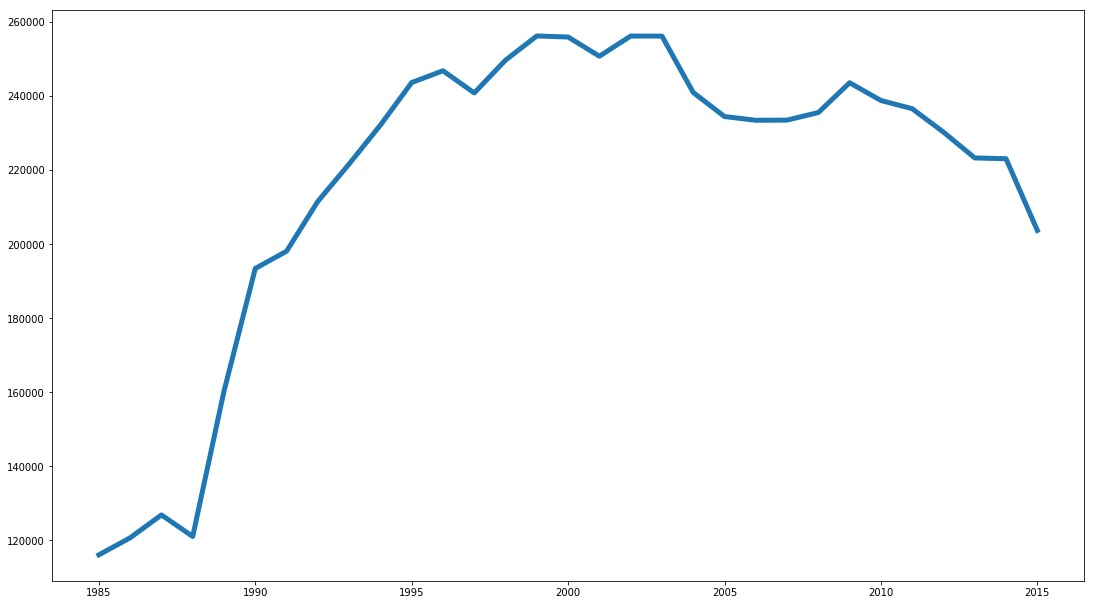

In [4]:
#Group data by year & sum 
fig = plt.gcf()
data_year_sum = data.groupby("year").agg(sum)
data_year_sum = data_year_sum.drop(["population","suicides/100k pop","gdp_per_capita ($)"],axis=1)
data_year_sum = data_year_sum.drop(2016)
#data_year_sum.plot.line();
plt.plot(data_year_sum.index,data_year_sum["suicides_no"],linewidth=5)

fig.set_size_inches(18.5, 10.5)
plt.show();

In [5]:
data_country_mean = data.groupby(["country","year"]).agg(np.mean)
data_country_mean = data_country_mean.drop(["Saint Kitts and Nevis","Dominica"])
data_country_mean = data_country_mean.loc[["Jamaica","Germany","Japan","Russian Federation","United States","Switzerland"]]
data_country_mean = data_country_mean.drop(["suicides_no","population","gdp_per_capita ($)"], axis=1)

In [6]:
data_country_mean.reset_index(inplace=True)

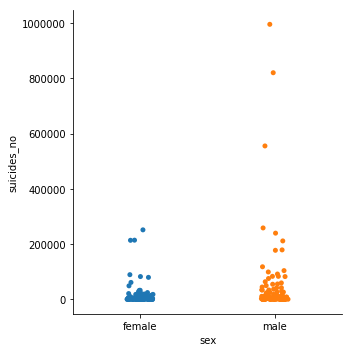

In [7]:
Sex_Country = data.groupby(["country","sex"]).agg(sum)

Sex_Country = Sex_Country.drop(["year","population","gdp_per_capita ($)","suicides/100k pop"],axis=1)
Sex_Country.reset_index(inplace=True)
sns.catplot(x="sex", y="suicides_no", data=Sex_Country);

In [8]:
Sex_Country = pd.pivot_table(data,values=["suicides_no"], index=["country","sex"], aggfunc=np.sum)
Sex_Country.reset_index(inplace=True)
#Sex_Country.index = Sex_Country.country
#del Sex_Country["country"]
combined_suicides_raw = list()
combined_suicides = list()
male = list()
female = list()
for x in Sex_Country.suicides_no:
    combined_suicides_raw.append(x)
y=0
while y < len(Sex_Country.sex):
    x = combined_suicides_raw[y]
    female.append(x)
    x = combined_suicides_raw[y+1]
    male.append(x)
    y+=2
x=0
while x < len(Sex_Country.sex):
    y = combined_suicides_raw[x] + combined_suicides_raw[x+1]
    combined_suicides.append(y)
    x+=2
countrys = list()
for x in Sex_Country.country:
    if x not in countrys:
        countrys.append(x)

In [9]:
#Countrys = data.groupby("country").agg()
Country = pd.DataFrame()
Country["combined"] = combined_suicides
Country["Female"] = female
Country["Male"] = male
Country["perc_male"] = Country["Male"]/Country["combined"]
Country["perc_female"] = Country["Female"]/Country["combined"]
Country["perc100"] = Country["perc_male"]+Country["perc_female"]
Country["country"] = countrys
def to_list(data):
    liste = list()
    for x in data:
        liste.append(x)
    return liste
perc_female = to_list(Country["perc_female"])
perc100 = to_list(Country["perc100"])
perc_male = to_list(Country["perc_male"])
Country = Country.sort_values(by="perc_male")
Country = Country.drop([65,79,27,76])

## Which gender is more likely to commit suicide

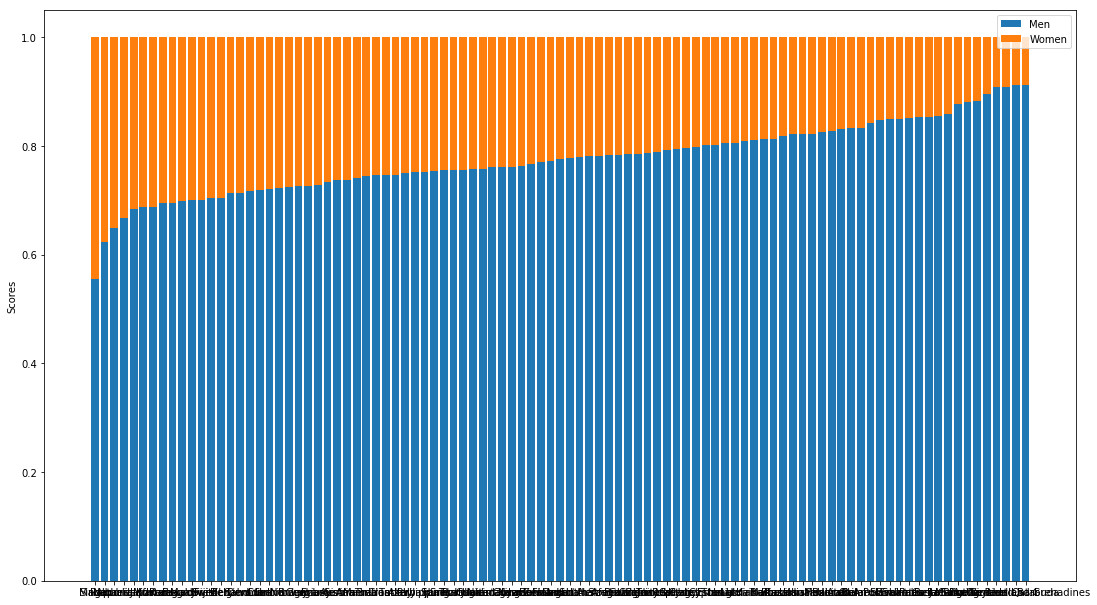

In [10]:
fig = plt.gcf()
width = 2       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(Country.country, Country.perc_male)
p2 = plt.bar(Country.country, Country.perc_female,
             bottom=Country.perc_male)

plt.ylabel('Scores')
#plt.title('Percentage scuicide per gender & country')
plt.legend((p1[0], p2[0]), ('Men', 'Women'))
fig.set_size_inches(18.5, 10.5)

plt.show();


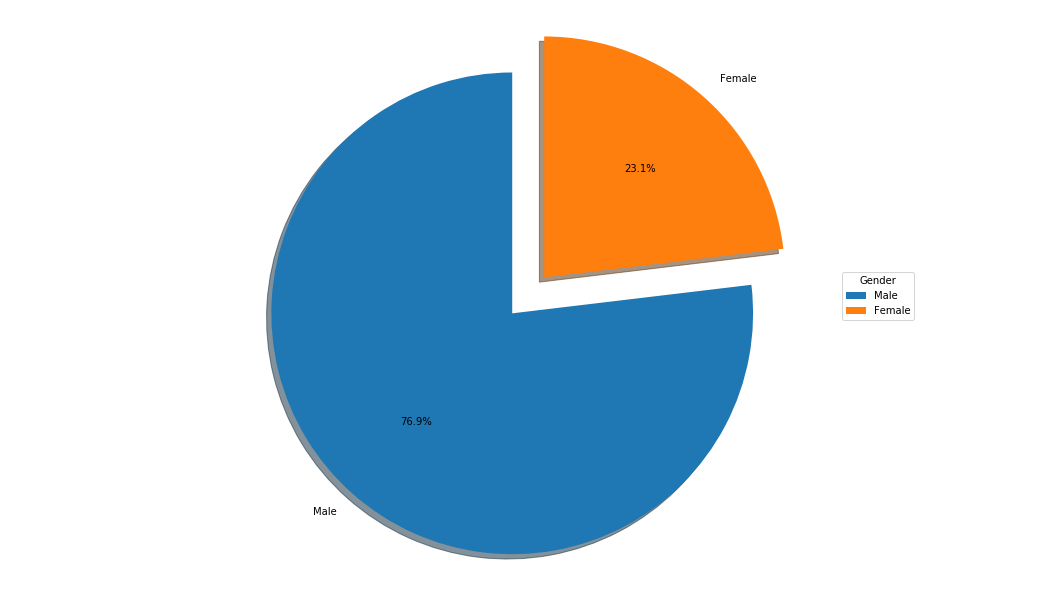

In [11]:
#fig = plt.gcf()
Sex_Country = data.groupby("sex").agg(sum)

Sex_Country = Sex_Country.drop(["year","population","gdp_per_capita ($)","suicides/100k pop"],axis=1)
Sex_Country.reset_index(inplace=True)
labels = ["Male","Female"] 
sizes = [5188910, 1559510]
explode = (0, 0.2,) 

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  

ax1.legend(
          title="Gender",
          loc="center left",
          bbox_to_anchor=(0.8, 0, 1, 1))
fig1.set_size_inches(18.5, 10.5)


plt.show();

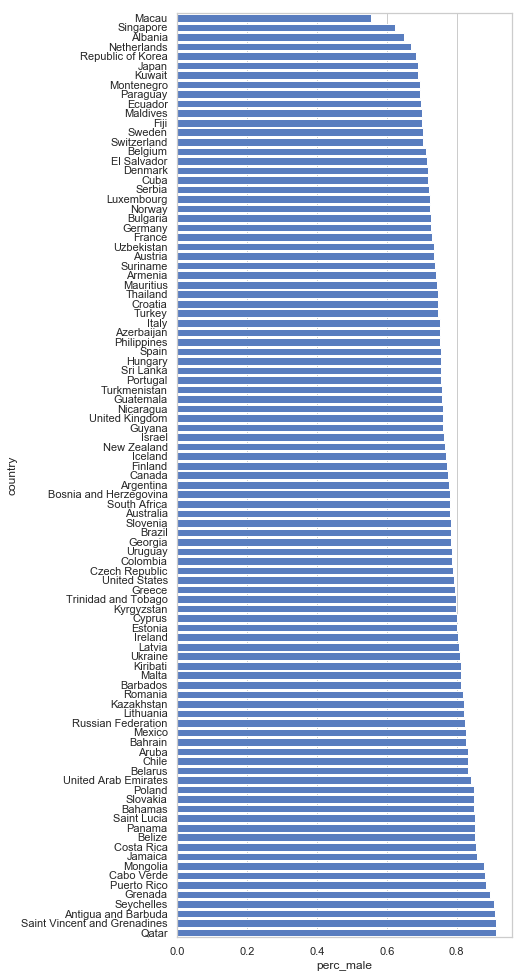

In [12]:
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 17))

# Plot the female deaths
sns.set_color_codes("pastel")
sns.barplot(x="perc_female", y="country", data=Country,
            label="Female Suicides", color="b")

# Plot the male deaths
sns.set_color_codes("muted")
sns.barplot(x="perc_male", y="country", data=Country,
            label="Male Suicides", color="b");

In [13]:
country_per_100 = data.groupby("country").agg(np.mean)[["suicides/100k pop","gdp_per_capita ($)"]]
country_per_100 = country_per_100.sort_values("suicides/100k pop")
country_per_100 = country_per_100.drop(["Saint Kitts and Nevis","Dominica"])
#drop every 2nd country for visualityproblems on beamer
list2 = country_per_100.index[1::2]
country_per_100 = country_per_100.drop(list2)

#country_per_100

## Suiciderate per 100k per Country

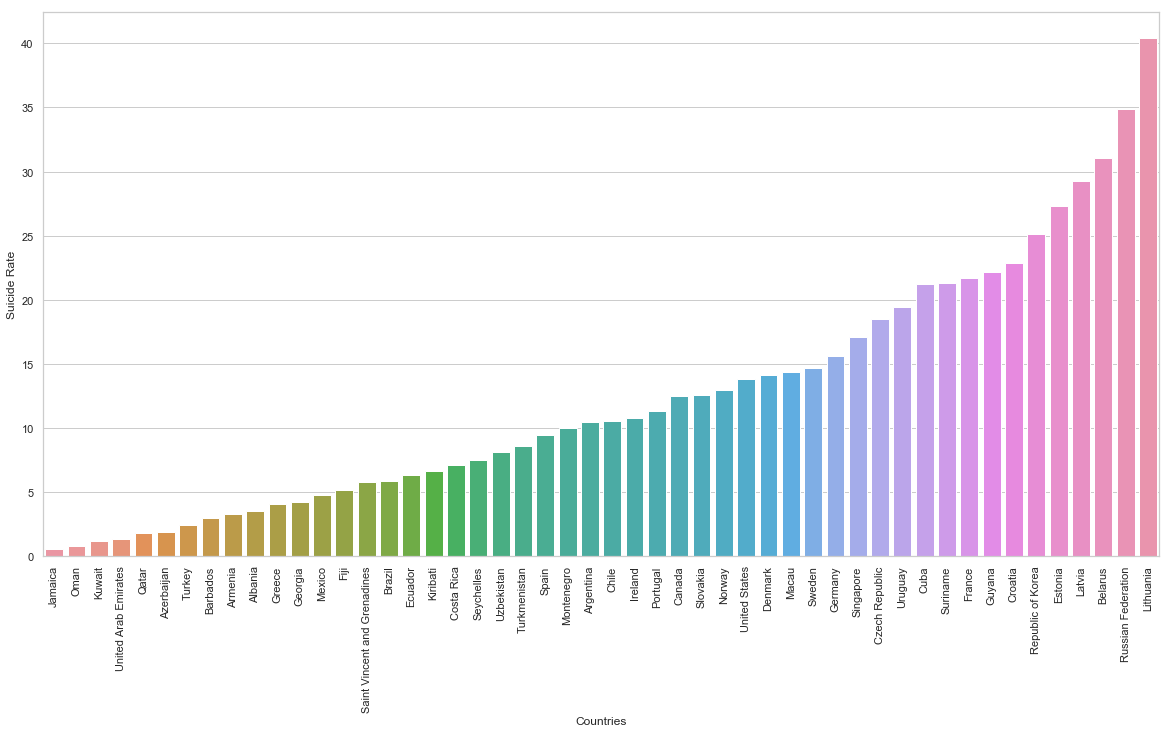

In [14]:
plt.figure(figsize=(20,10))
plt1 = sns.barplot(x=country_per_100.index, y=country_per_100['suicides/100k pop'])
#plt1.set_tick_params(width=5)
plt.xticks(rotation= 90)
plt.xlabel('Countries')
plt.ylabel('Suicide Rate')
#plt.title('Suicide Rate of Countries per 100k')
fig.set_size_inches(18.5, 10.5);

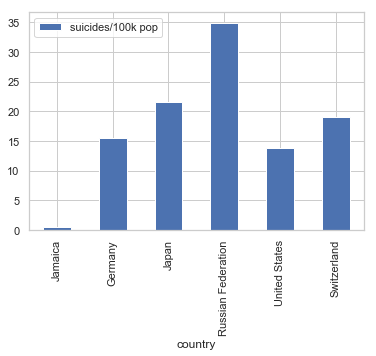

In [15]:
data_country_mean = data.groupby("country").agg(np.mean)
data_country_mean = data_country_mean.sort_values(by="suicides/100k pop")
data_country_mean = data_country_mean.drop(["Saint Kitts and Nevis","Dominica"])
data_country_mean = data_country_mean.loc[["Jamaica","Germany","Japan","Russian Federation","United States","Switzerland"]]
data_country_mean = data_country_mean.drop(["year","suicides_no","population","gdp_per_capita ($)"], axis=1)
#data_country_mean.reset_index(inplace=True)
data_country_mean.plot.bar();

# Is there a correlation between:

### --->GDP per capita (gross domestic product) or 
### --->populationsize

# to the suicide-rate per 100k?

                    population  suicides/100k pop  gdp_per_capita ($)
population            1.000000           0.097032            0.078947
suicides/100k pop     0.097032           1.000000            0.038206
gdp_per_capita ($)    0.078947           0.038206            1.000000


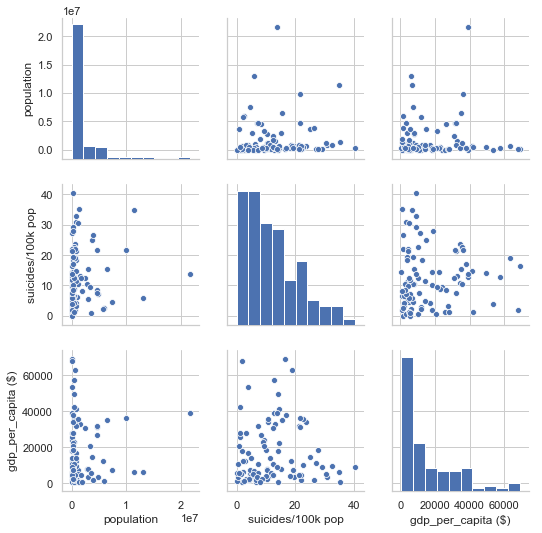

In [16]:
corr = data.groupby(["country"]).agg(np.mean)
corr.reset_index(inplace=True)
corr = corr.drop(["year","suicides_no","country"],axis=1)
print(corr.corr())
g = sns.pairplot(corr)
#corr


In [17]:
DAX = pd.read_csv("DAX.csv")
DOW_JONES = pd.read_csv("DOW_JONES.csv")


In [18]:
#Jamaica Data From https://www.jamstockex.com/market-data/index-data/main-market/jse-index 
jamaica_raw = (1987,1509,1988,1428,1989,2075,1990,2550,1991,7900,1992,25750,1993,12897,1994,19650,1995,14400,1996,17500,1997,19950,1998,20150,1999,21850,2000,28650,2001,33850,2002,45900,2003,67590,2004,112310,2005,104000,2006,98800,2007,107000,2008,77700,2009,75700,2010,85500,2011,95300,2012,91800,2013,80000,2014,76400,2015,150700)
jamaica_year = list()
jamaica_points = list()
d=False
index=0
while d == False:
    try: 
        jamaica_year.append(jamaica_raw[index])
        index +=1
        jamaica_points.append(jamaica_raw[index])
        index +=1
    except:d=True

In [19]:
Jamaica = pd.DataFrame()
Jamaica["year"] = jamaica_year
Jamaica["Indexpoints"] = jamaica_points

In [20]:
data2 = data
data2["year"] = data2.year.astype(str)
data_country_year = data.groupby(["country","year"]).agg(np.mean)

In [21]:
Countrylist = ["Germany","United States","Jamaica"]
for x in data_country_year.index:
    if x[0] not in Countrylist:
        data_country_year = data_country_year.drop(x[0], level="country")

In [22]:
data_country_years = data_country_year.drop(x[0], level="country")

In [23]:
data_country_years = data_country_years.reset_index()
data_country_years.drop(["suicides_no","population","gdp_per_capita ($)"], axis=1)
data_germany = data_country_years.get(data_country_years.country == "Germany")
data_jamaica = data_country_years.get(data_country_years.country == "Jamaica")
data_usa = data_country_years.get(data_country_years.country == "United States")

In [24]:
data_germany["year"] = data_germany["year"].astype(float)
data_jamaica["year"] = data_jamaica["year"].astype(float)
data_usa["year"] = data_usa["year"].astype(float)

In [25]:
#merge countrys 
germany = DAX.merge(data_germany, on="year")
jamaica = Jamaica.merge(data_jamaica, on="year")
usa = DOW_JONES.merge(data_usa, on="year")

In [26]:
def percentages(df, dfindex):
    start = 0 
    perc_list = list()
    for x in dfindex:
        if start == 0:
            start=x
            perc_list.append(1)
        else:
            perc_list.append(x/start)
    return perc_list

def percentages_pa(df, dfindex):
    start = 0 
    perc_list = list()
    for x in dfindex:
        if start == 0:
            start=x
            perc_list.append(1)
        else:
            perc_list.append(x/start)
            start = x
    return perc_list

In [27]:
germany["perc"] = percentages(germany, germany.DAXClose)
jamaica["perc"] = percentages(jamaica, jamaica.Indexpoints) 
usa["perc"] = percentages(usa, usa.DOW_JONESClose)
germany["perc_pa"] = percentages_pa(germany, germany.DAXClose)
jamaica["perc_pa"] = percentages_pa(jamaica, jamaica.Indexpoints) 
usa["perc_pa"] = percentages_pa(usa, usa.DOW_JONESClose)
jamaicasafe=jamaica
usasafe=usa
germanysafe=germany

# A second Dataset will join so that we can compare a bit more stuff! 

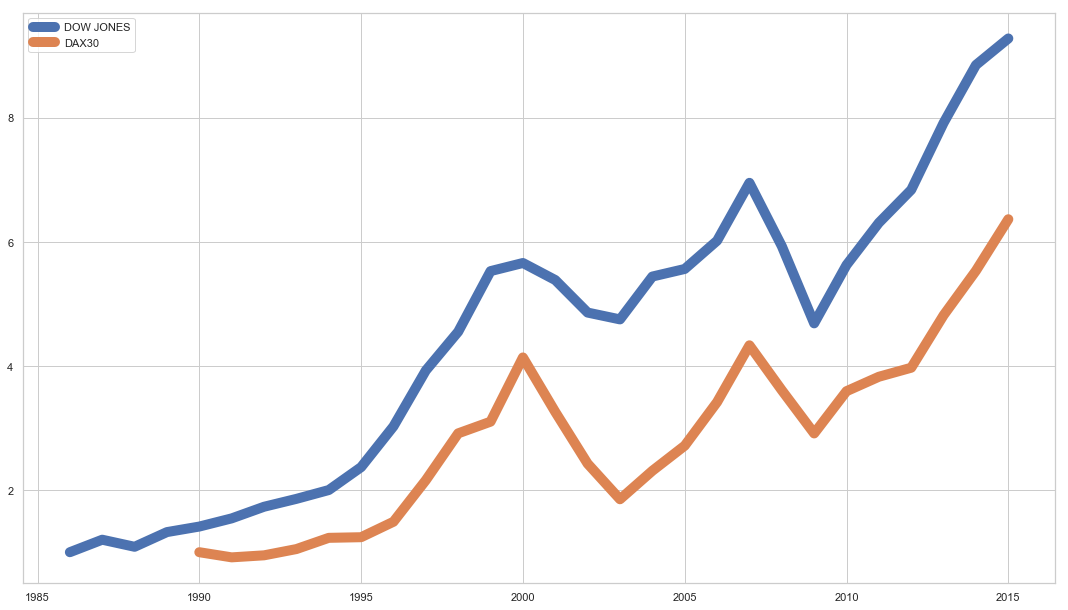

In [28]:
fig = plt.gcf()
p2=plt.plot(usa.year,usa.perc,label="DOW JONES",linewidth=10)
p1=plt.plot(germany.year,germany.perc,label="DAX",linewidth=10)
plt.labels=("DOW JONES","DAX 30")
fig.set_size_inches(18.5, 10.5)
plt.legend((p2[0], p1[0]), ('DOW JONES', 'DAX30'))


plt.show()

## JAMAICA JOINS THE BATTLE 

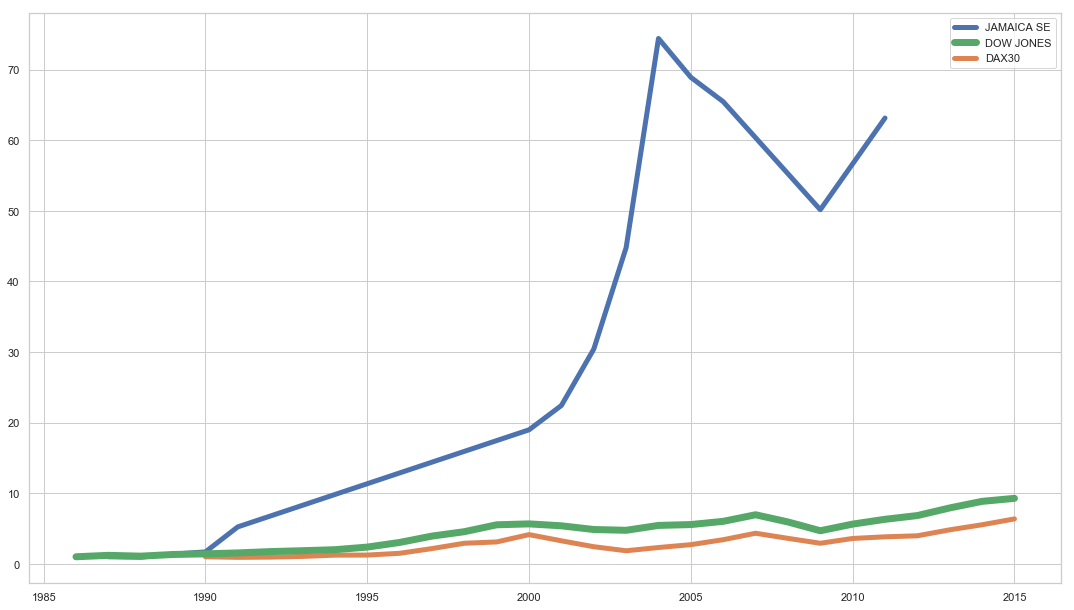

In [29]:
fig = plt.gcf()

p3 = plt.plot(jamaica.year,jamaica.perc,linewidth=5)
p1 = plt.plot(germany.year,germany.perc,linewidth=5)
p2 = plt.plot(usa.year,usa.perc,linewidth=7)
fig.set_size_inches(18.5, 10.5)
plt.legend((p3[0],p2[0], p1[0]), ("JAMAICA SE",'DOW JONES', 'DAX30'))



plt.show()

Insert the Name of the Company to add stock, otherwise enter "done": ÖÖÖÖÖÖÖÖÖPPPEEEEL
Insert the SHORT NAME (Stockname) to add stock, otherwise enter "done": aapl
Insert the Name of the Company to add stock, otherwise enter "done": done
['ÖÖÖÖÖÖÖÖÖPPPEEEEL']
['AAPL']
mhm we've just received a shit ton of data from AAPL


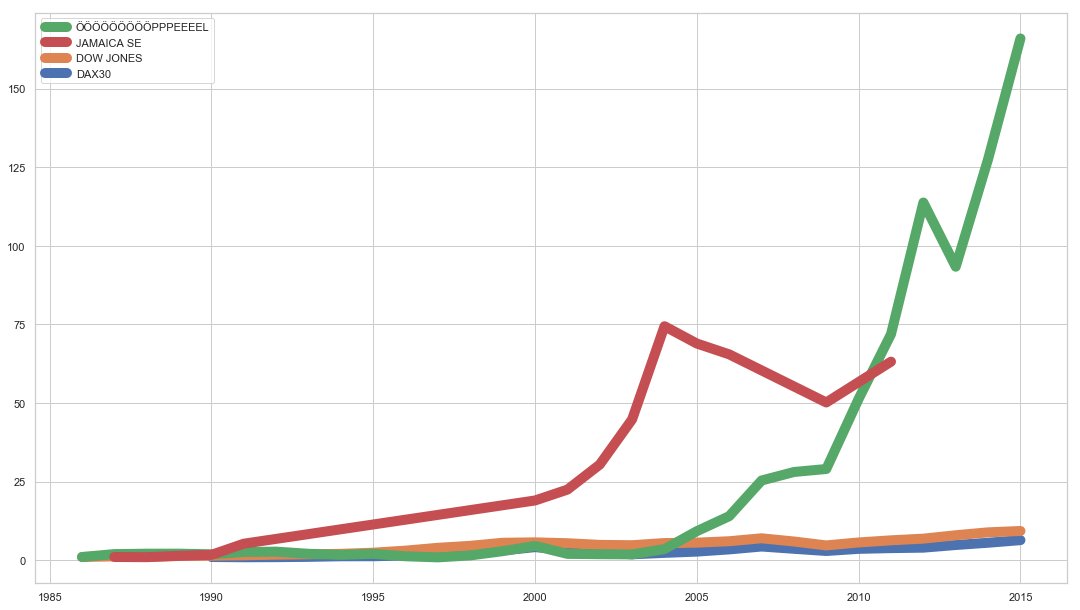

In [30]:
%run Pipeline_copy.ipynb

Indexe=Startprocess[0][0]
import datetime
df_all['year'] = pd.DatetimeIndex(df_all.Date).year
df_all = df_all.get(df_all[Indexe+"Close"] != "null")
df_all[Indexe+"Close"] = df_all[Indexe+"Close"].astype(float)
df_all.reset_index(inplace=True)
df_all = df_all.drop(["index",Indexe+"Open",Indexe+"High",Indexe+"Low",Indexe+"Adj Close",Indexe+"Volume","Date"],axis=1)
df_all = df_all.groupby("year").agg(np.mean)
df_all["perc"] = percentages(df_all, df_all[Indexe+"Close"])
df_all = df_all.reset_index()
df_all = df_all.drop([Indexe+"Close"],axis=1)

fig = plt.gcf()

p1 = plt.plot(germanysafe.year,germanysafe.perc,linewidth=10)
p2 = plt.plot(usasafe.year,usasafe.perc,linewidth=10)
p4 = plt.plot(df_all.year,df_all.perc,linewidth=10)
p3 = plt.plot(jamaica.year,jamaica.perc,linewidth=10)
plt.legend((p4[0],p3[0],p2[0], p1[0]), (Indexe,"JAMAICA SE",'DOW JONES', 'DAX30'))

fig.set_size_inches(18.5, 10.5)

plt.show()

In [31]:
germany = germany.drop(["perc","year","DAXClose", "suicides_no", "population","gdp_per_capita ($)","country"],axis=1)
jamaica = jamaica.drop(["perc","year","Indexpoints", "suicides_no", "population","gdp_per_capita ($)","country"],axis=1)
usa = usa.drop(["perc","year","DOW_JONESClose", "suicides_no", "population","gdp_per_capita ($)","country"],axis=1)

correlation DAX30/suicides

                   suicides/100k pop   perc_pa
suicides/100k pop           1.000000 -0.048655
perc_pa                    -0.048655  1.000000


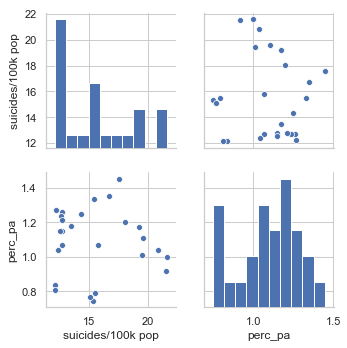

In [32]:
print("correlation DAX30/suicides\n")
print(germany.corr())
germ = sns.pairplot(germany)

correlation JSE(Jamaica stocks/suicides

                   suicides/100k pop   perc_pa
suicides/100k pop           1.000000 -0.366717
perc_pa                    -0.366717  1.000000


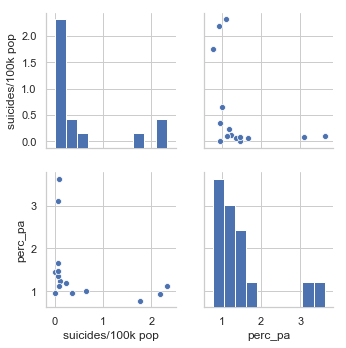

In [33]:
print("correlation JSE(Jamaica stocks/suicides\n")
print(jamaica.corr())
jam = sns.pairplot(jamaica)

correlation Dow Jones/suicides

                   suicides/100k pop   perc_pa
suicides/100k pop           1.000000  0.175664
perc_pa                     0.175664  1.000000


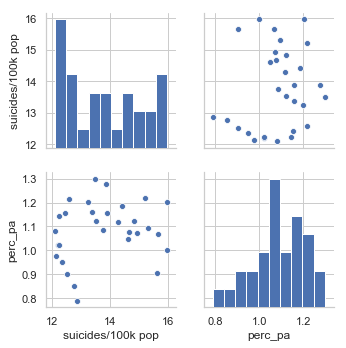

In [34]:
print("correlation Dow Jones/suicides\n")
print(usa.corr())
us = sns.pairplot(usa)

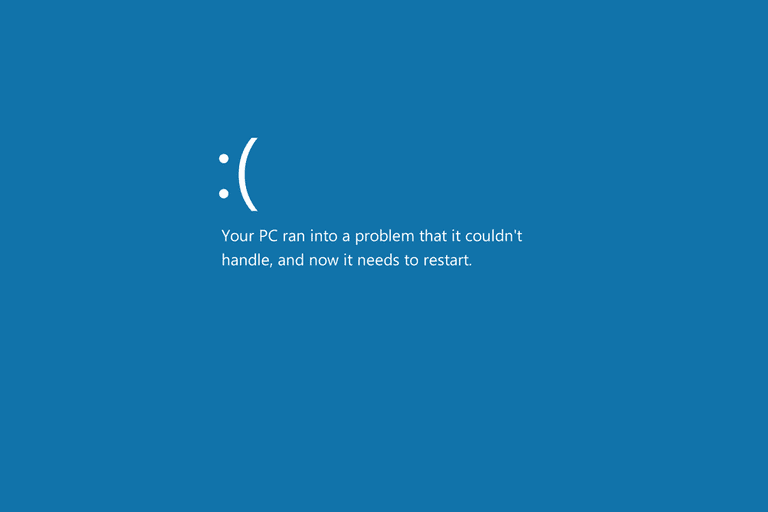

In [35]:
url = "https://www.lifewire.com/thmb/thHfsXjm8_6L3lZHlL7Lqkwc5bw=/768x0/filters:no_upscale():max_bytes(150000):strip_icc()/blue-screen-of-death-bsod-windows-583d9aa55f9b58d5b1e4f024.PNG"
from PIL import Image
import requests
from io import BytesIO

response = requests.get(url)
img = Image.open(BytesIO(response.content))
img


In [36]:
print(url,"\n28.06.2019 at 10:10")

https://www.lifewire.com/thmb/thHfsXjm8_6L3lZHlL7Lqkwc5bw=/768x0/filters:no_upscale():max_bytes(150000):strip_icc()/blue-screen-of-death-bsod-windows-583d9aa55f9b58d5b1e4f024.PNG 
28.06.2019 at 10:10
